# Clustering Case Study

**What do the instances that comprise the dataset represent?**

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

**Additional Information**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.

data source : https://archive.ics.uci.edu/ml/datasets/seeds

Charytanowicz, Magorzata, Niewczas, Jerzy, Kulczycki, Piotr, Kowalski, Piotr & Lukasik, Szymon. (2012). seeds. UCI Machine Learning Repository.

# Import Libraries

In [21]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
from ipywidgets import interact

import plotly.io as pio
pio.renderers.default = "notebook"

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.precision", 3)
pd.options.display.float_format = '{:,.2f}'.format

import plotly
import sklearn

In [22]:
print(f"pandas = {pd.__version__}\n"
      f"numpy = {np.__version__}\n"
      f"seaborn = {sns.__version__}\n"
      f"plotly = {plotly.__version__}\n"
      f"scikit-learn = {sklearn.__version__}")

pandas = 2.1.4
numpy = 1.26.4
seaborn = 0.12.2
plotly = 5.9.0
scikit-learn = 1.1.3


# Ingest Data  

In [23]:
df = pd.read_csv("seeds_dataset.txt", header=None, delim_whitespace=True)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.87,5.76,3.31,2.22,5.22,1
1,14.88,14.57,0.88,5.55,3.33,1.02,4.96,1
2,14.29,14.09,0.91,5.29,3.34,2.70,4.83,1
3,13.84,13.94,0.90,5.32,3.38,2.26,4.80,1
4,16.14,14.99,0.90,5.66,3.56,1.35,5.17,1


# EDA

## Implement basic steps to see how is your data looks like

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
 7   7       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [25]:
df.shape

(210, 8)

In [26]:
df.duplicated().sum()

0

In [27]:
df.isna().sum().any()

False

## Convert columns names and Map Class names

In [28]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

In [29]:
df.columns = ["area", "perimeter", "compactness", "length_of_kernel",
              "width_of_kernel", "assym_coef", "length_of_kernel_groove", "kernel_class"]

In [30]:
df.columns

Index(['area', 'perimeter', 'compactness', 'length_of_kernel',
       'width_of_kernel', 'assym_coef', 'length_of_kernel_groove',
       'kernel_class'],
      dtype='object')

In [31]:
df["kernel_class"] = df.kernel_class.map({1: "Kama", 2: "Rosa", 3: "Canadian"})

In [32]:
df.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,assym_coef,length_of_kernel_groove,kernel_class
0,15.26,14.84,0.87,5.76,3.31,2.22,5.22,Kama
1,14.88,14.57,0.88,5.55,3.33,1.02,4.96,Kama
2,14.29,14.09,0.91,5.29,3.34,2.70,4.83,Kama
3,13.84,13.94,0.90,5.32,3.38,2.26,4.80,Kama
4,16.14,14.99,0.90,5.66,3.56,1.35,5.17,Kama


## Visualy inspect the some features

In [35]:
# Create a figure
fig = go.Figure()

# Add histograms for each column
for col in df.columns:
    fig.add_trace(
        go.Histogram(x=df[col], name=col, visible=(col==df.columns[0]))
    )

# Create a dropdown menu
buttons = []
for i, col in enumerate(df.columns):
    visibility = [i==j for j in range(len(df.columns))]
    button = dict(
        label=col,
        method="update",
        args=[{"visible": visibility}]
    )
    buttons.append(button)

# Add the dropdown menu to the layout
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Show the figure
fig.show()


In [36]:
fig = go.Figure()

# Add box plots for each column
for col in df.columns:
    fig.add_trace(
        go.Box(x=df["kernel_class"], y=df[col], name=col, visible=(col==df.columns[0]))
    )

# Create a dropdown menu
buttons = []
for i, col in enumerate(df.columns):
    visibility = [i==j for j in range(len(df.columns))]
    button = dict(
        label=col,
        method="update",
        args=[{"visible": visibility}]
    )
    buttons.append(button)

# Add the dropdown menu to the layout
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Show the figure
fig.show()

In [37]:
# Create a figure
fig = go.Figure()

# Add histograms for each kernel_class
for kernel_class in df['kernel_class'].unique():
    df_class = df[df['kernel_class'] == kernel_class]
    for col in df_class.columns:
        fig.add_trace(
            go.Histogram(x=df_class[col], name=f'{col}_{kernel_class}', visible=(col==df.columns[0]), nbinsx=12)
        )

# Create a dropdown menu
buttons = []
for i, col in enumerate(df.columns):
    visibility = [i==j for j in range(len(df.columns))]
    button = dict(
        label=col,
        method="update",
        args=[{"visible": visibility}]
    )
    buttons.append(button)

# Add the dropdown menu to the layout
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Show the figure
fig.show()


In [38]:
def column_boxer(col):
    df[col].plot(kind="box")


cols = df.columns
interact(column_boxer, col=cols)

interactive(children=(Dropdown(description='col', options=('area', 'perimeter', 'compactness', 'length_of_kern…

<function __main__.column_boxer(col)>

In [39]:
# Create a figure
fig = go.Figure()

# Add box plots for each column
for col in df.columns:
    fig.add_trace(
        go.Box(x=df["kernel_class"], y=df[col], name=col, visible=(col==df.columns[0]))
    )

# Create a dropdown menu
buttons = []
for i, col in enumerate(df.columns):
    visibility = [i==j for j in range(len(df.columns))]
    button = dict(
        label=col,
        method="update",
        args=[{"visible": visibility}]
    )
    buttons.append(button)

# Add the dropdown menu to the layout
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Show the figure
fig.show()


## Decriptive statistics

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,210.00,14.85,2.91,10.59,12.27,14.36,17.30,21.18
perimeter,210.00,14.56,1.31,12.41,13.45,14.32,15.71,17.25
compactness,210.00,0.87,0.02,0.81,0.86,0.87,0.89,0.92
length_of_kernel,210.00,5.63,0.44,4.90,5.26,5.52,5.98,6.67
width_of_kernel,210.00,3.26,0.38,2.63,2.94,3.24,3.56,4.03
assym_coef,210.00,3.70,1.50,0.77,2.56,3.60,4.77,8.46
length_of_kernel_groove,210.00,5.41,0.49,4.52,5.04,5.22,5.88,6.55


In [41]:
def color_corr(val):
    if val > 0.89:
        color = 'red'
    elif val < -0.89:
        color = 'blue'
    else:
        color = 'gray'
    return 'background-color: %s' % color


df.corr(numeric_only=True).style.applymap(color_corr)

,area,perimeter,compactness,length_of_kernel,width_of_kernel,assym_coef,length_of_kernel_groove
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
length_of_kernel,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
width_of_kernel,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
assym_coef,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
length_of_kernel_groove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


In [42]:
fig = px.imshow(df.corr(numeric_only=True),
                height=500,
                width=500,
                range_color=[-1, 1],
                color_continuous_scale='RdBu_r'
                )
fig.show()

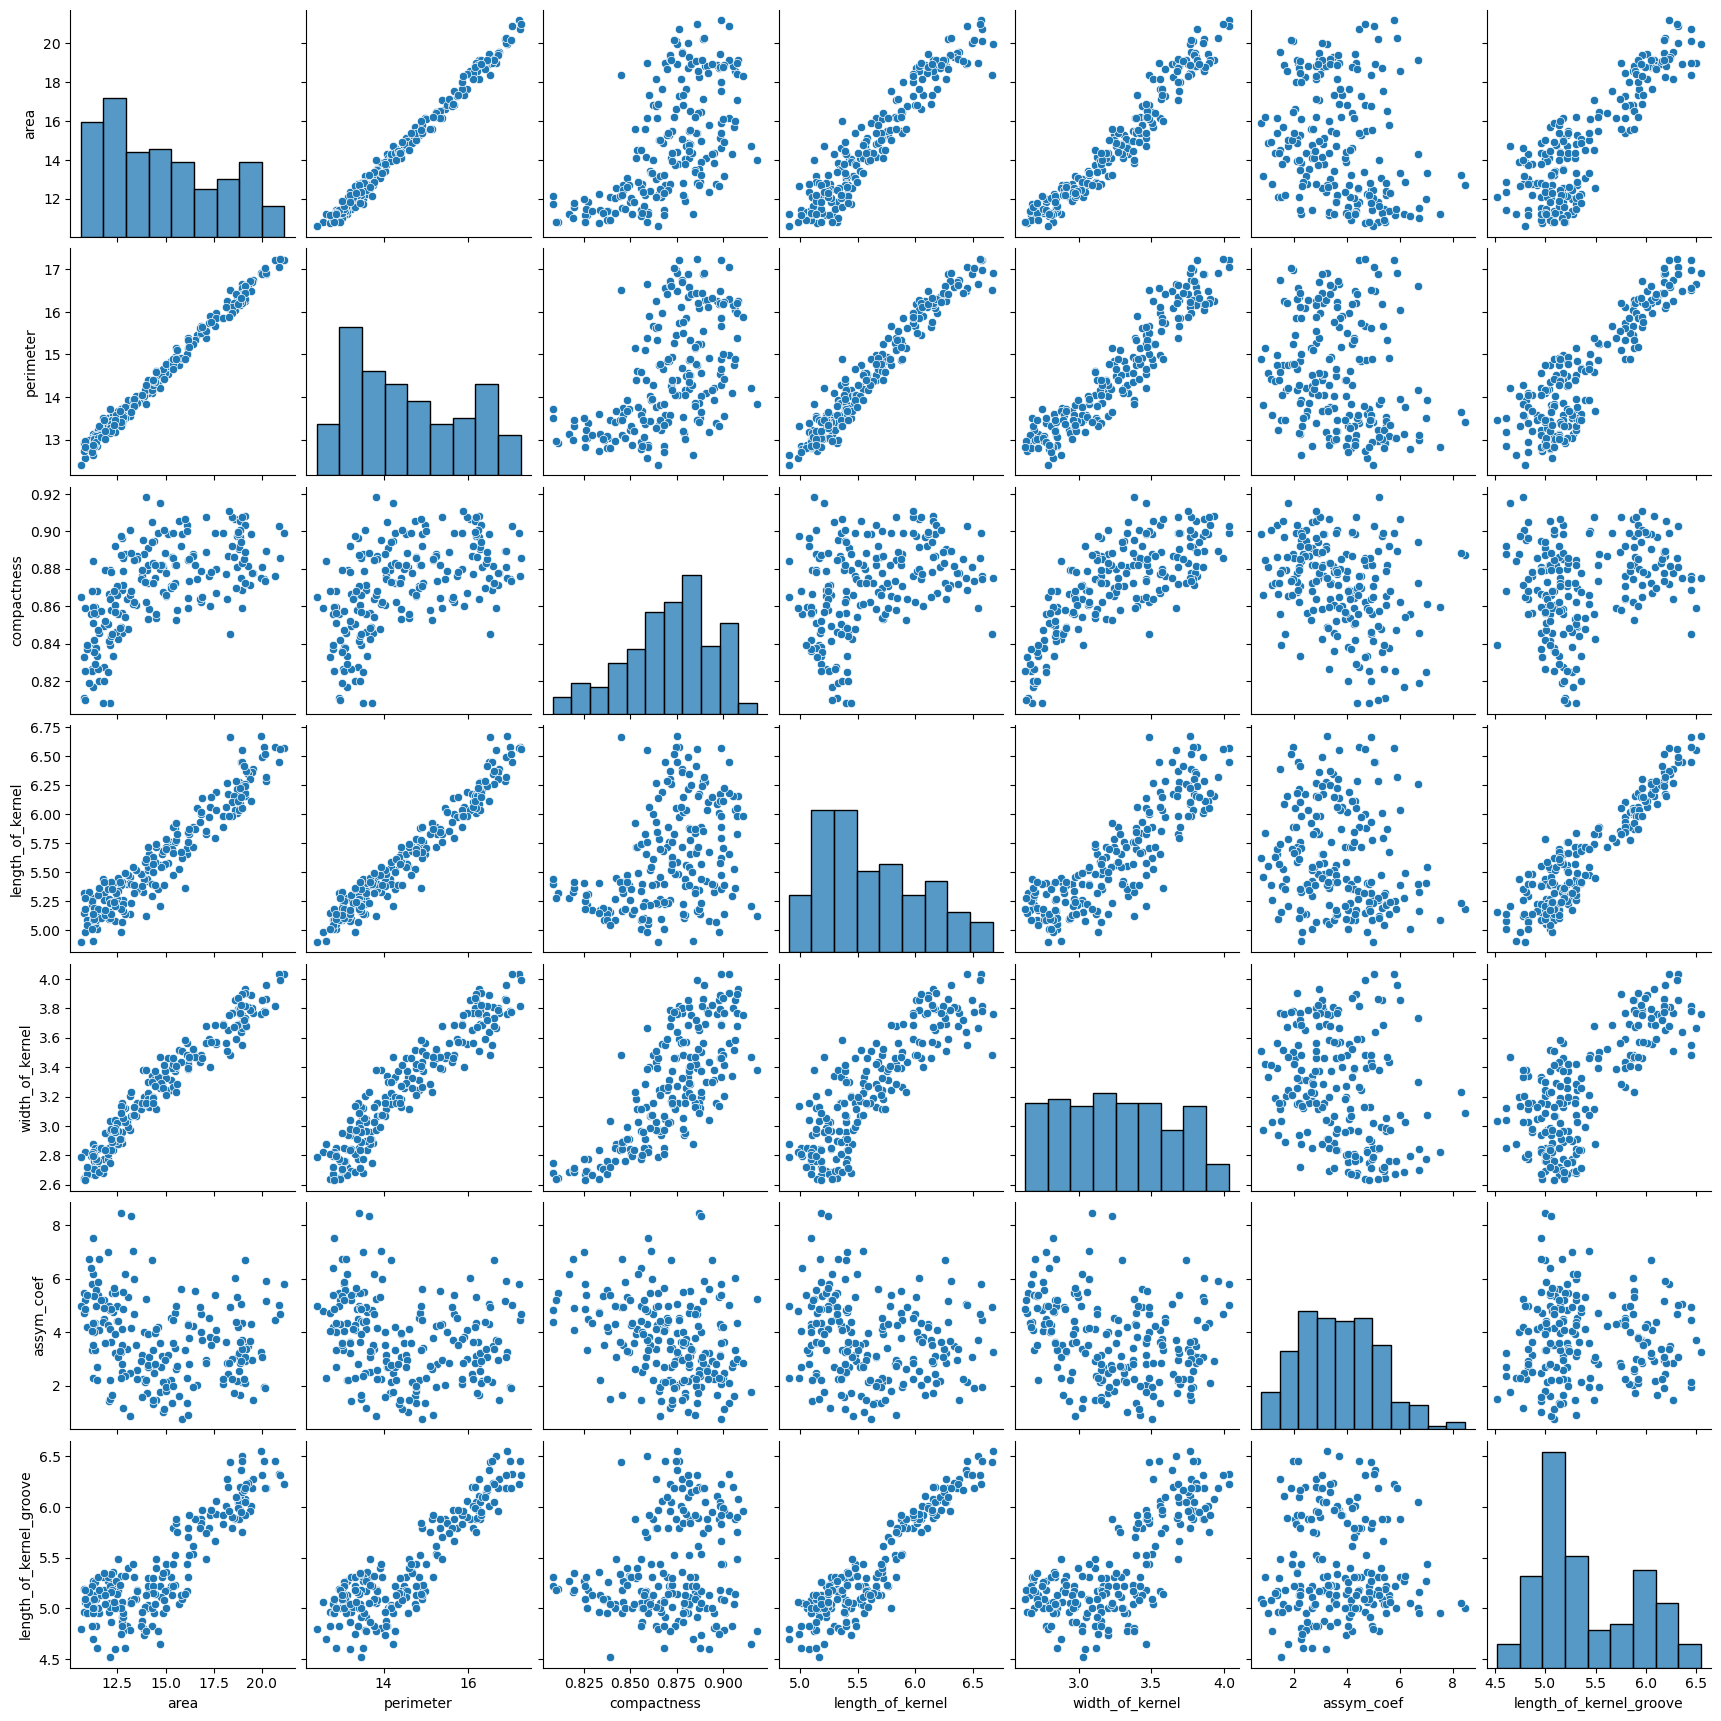

In [43]:
sns.pairplot(df)

# Data Preprocessing

## Drop the features that can't be used in clustering
* Hint:  there are no labels in clustering projects

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [45]:
X = df.drop(["kernel_class"], axis=1)

In [46]:
X

,area,perimeter,compactness,length_of_kernel,width_of_kernel,assym_coef,length_of_kernel_groove
0,15.26,14.84,0.87,5.76,3.31,2.22,5.22
1,14.88,14.57,0.88,5.55,3.33,1.02,4.96
2,14.29,14.09,0.91,5.29,3.34,2.70,4.83
3,13.84,13.94,0.90,5.32,3.38,2.26,4.80
4,16.14,14.99,0.90,5.66,3.56,1.35,5.17
...,...,...,...,...,...,...,...
205,12.19,13.20,0.88,5.14,2.98,3.63,4.87
206,11.23,12.88,0.85,5.14,2.79,4.33,5.00
207,13.20,13.66,0.89,5.24,3.23,8.31,5.06
208,11.84,13.21,0.85,5.17,2.84,3.60,5.04


In [47]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Modelling

## Hopkins Test
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 0 express an uniform distrubution so clustering can't be useful and 1 express  not an uniform distrubution hence clusterering can be useful.

In [48]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform


def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
        X = X.values  # convert dataframe to a numpy array
    # 0.05 (5%) based on paper by Lawson and Jures
    sample_size = int(X.shape[0] * ratio)

    # a uniform random sample in the original data space
    X_uniform_random_sample = uniform(
        X.min(axis=0), X.max(axis=0), (sample_size, X.shape[1]))

    # a random sample of size sample_size from the original data X
    random_indices = sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    # initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(X)

    # u_distances = nearest neighbour distances from uniform random sample
    u_distances, u_indices = nbrs.kneighbors(
        X_uniform_random_sample, n_neighbors=2)
    # distance to the first (nearest) neighbour
    u_distances = u_distances[:, 0]

    # w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances, w_indices = nbrs.kneighbors(X_sample, n_neighbors=2)
    # distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[:, 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    # compute and return hopkins' statistic
    H = u_sum / (u_sum + w_sum)
    return H

In [49]:
hopkins(X, .05)

0.8076494938804791

In [50]:
# It is better to use in that way if your data is not large and you have time.
result = []
for _ in range(10):
    result.append(hopkins(X, .05))
np.mean(result)

0.8230482726144721

## Clustering with K-means

### Elbow Method
### We use this method to find optimal k value by looking up to break point of graph.

In [51]:
ssd = []

K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

In [52]:
ssd

[659.1717544870407,
 430.65897315130064,
 371.5811909715525,
 326.3061827611607,
 289.98412606307835,
 262.3496758683565,
 240.32361259444184,
 222.4007981117168]

In [53]:
pd.Series(ssd).diff()

0       NaN
1   -228.51
2    -59.08
3    -45.28
4    -36.32
5    -27.63
6    -22.03
7    -17.92
dtype: float64

In [54]:
fig = px.line(x=K,
              y=ssd,
              range_x=[1, 10],
              hover_name=pd.Series(ssd).diff().values)

fig.show()

Text(0.5, 1.0, 'elbow method-distortion')

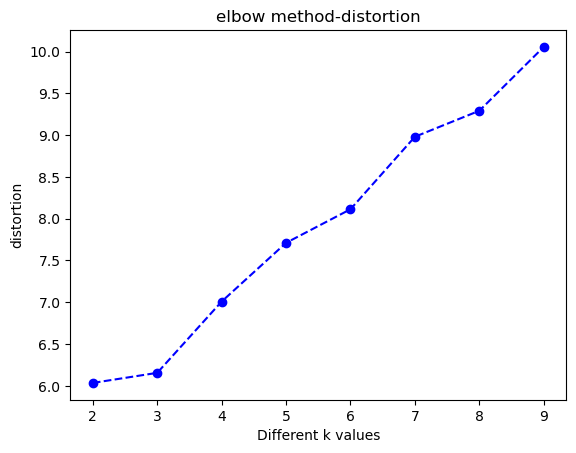

In [55]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X)
    # distances from each observation to each cluster centroid
    distances = kmeanModel.transform(X)
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        # distances from observations in each cluster to their own centroid
        cluster_distances = distances[labels == i, i]
        # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
        result.append(np.mean(cluster_distances ** 2))
    # sum the means of all clusters and add it to the distortion list
    distortion.append(sum(result))


plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method-distortion")

### Model Building and label visualisation

In [56]:
model = KMeans(n_clusters=3, random_state=101)
model.fit(X)

KMeans(n_clusters=3, random_state=101)

In [57]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [58]:
df["cluster"] = model.labels_

<Axes: xlabel='area', ylabel='width_of_kernel'>

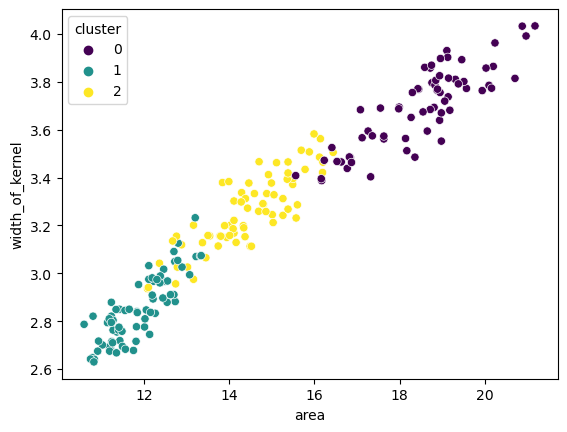

In [59]:
sns.scatterplot(x=df["area"],
                y=df["width_of_kernel"],
                hue=df.cluster,
                palette="viridis")

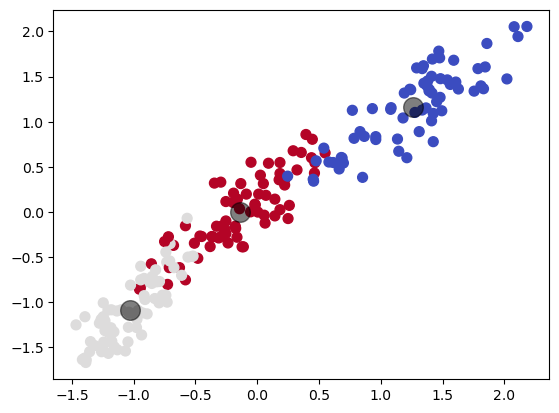

In [60]:
centroids = model.cluster_centers_

plt.scatter(X[:, 0], X[:, 4], c=df.cluster, s=50, cmap="coolwarm")
plt.scatter(centroids[:, 0], centroids[:, 4], c="black", s=200, alpha=0.5)

In [61]:
fig = px.scatter_3d(x=df["length_of_kernel_groove"],
                    y=df["width_of_kernel"],
                    z=df["length_of_kernel"],
                    color=df.cluster,
                    labels={"x": "length_of_kernel_groove",
                            "y": "width_of_kernel",
                            "z": "length_of_kernel"},
                    hover_name=df["kernel_class"])

fig.show()

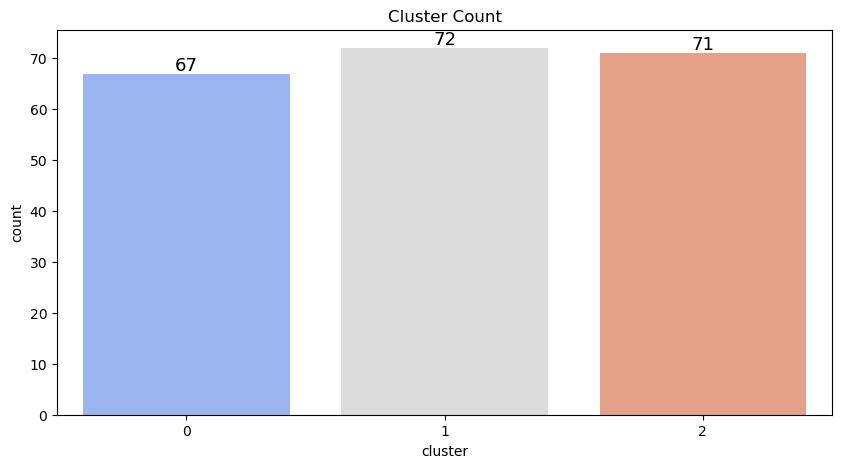

In [62]:
plt.figure(figsize=(10, 5))
plt.title("Cluster Count")
ax = sns.countplot(x=df.cluster, palette="coolwarm")
# ax.bar_label(ax.containers[0])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                size=13, xytext=(0, 6),
                textcoords='offset points')
plt.show()

In [63]:
df[df["cluster"] == 0]

,area,perimeter,compactness,length_of_kernel,width_of_kernel,assym_coef,length_of_kernel_groove,kernel_class,cluster
8,16.63,15.46,0.87,6.05,3.46,2.04,5.88,Kama,0
37,17.08,15.38,0.91,5.83,3.68,2.96,5.48,Kama,0
70,17.63,15.98,0.87,6.19,3.56,4.08,6.06,Rosa,0
71,16.84,15.67,0.86,6.00,3.48,4.67,5.88,Rosa,0
72,17.26,15.73,0.88,5.98,3.59,4.54,5.79,Rosa,0
...,...,...,...,...,...,...,...,...,...
131,18.94,16.32,0.89,6.14,3.83,2.91,5.95,Rosa,0
133,16.16,15.33,0.86,5.84,3.40,4.27,5.79,Rosa,0
134,15.56,14.89,0.88,5.78,3.41,4.97,5.85,Rosa,0
136,17.36,15.76,0.88,6.14,3.57,3.53,5.97,Rosa,0


In [64]:
pd.crosstab(df.kernel_class, df.cluster)  # 1--17, 2--16, 3--16, 4--17

cluster,0,1,2
kernel_class,,,
Canadian,0,66,4
Kama,2,6,62
Rosa,65,0,5


### Evaluate

In [65]:
from sklearn.metrics import silhouette_score

In [66]:
# towards to 1 means, data good clustered by model
print(f'Silhouette Score(n=3): {silhouette_score(X, df.cluster)}')

Silhouette Score(n=3): 0.4007270552751298


In [67]:
range_n_clusters = range(2, 9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.46577247686580914
For n_clusters=3, the silhouette score is 0.4007270552751298
For n_clusters=4, the silhouette score is 0.3369008229710853
For n_clusters=5, the silhouette score is 0.2863816249628832
For n_clusters=6, the silhouette score is 0.27930886443779596
For n_clusters=7, the silhouette score is 0.28251955610661084
For n_clusters=8, the silhouette score is 0.251137716662038


In [68]:
from sklearn.metrics.cluster import adjusted_rand_score as ari

In [69]:
kmeans_ari = ari(df["kernel_class"], df.cluster)
kmeans_ari

0.7732937360806309

In [70]:
scores_df = pd.DataFrame(kmeans_ari, columns=["ARI"], index=["Kmeans"])
scores_df["Silhouette Score"] = silhouette_score(X, df.cluster)
scores_df

,ARI,Silhouette Score
Kmeans,0.77,0.40


## Hierarchical Clustering

In [71]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Dendogram

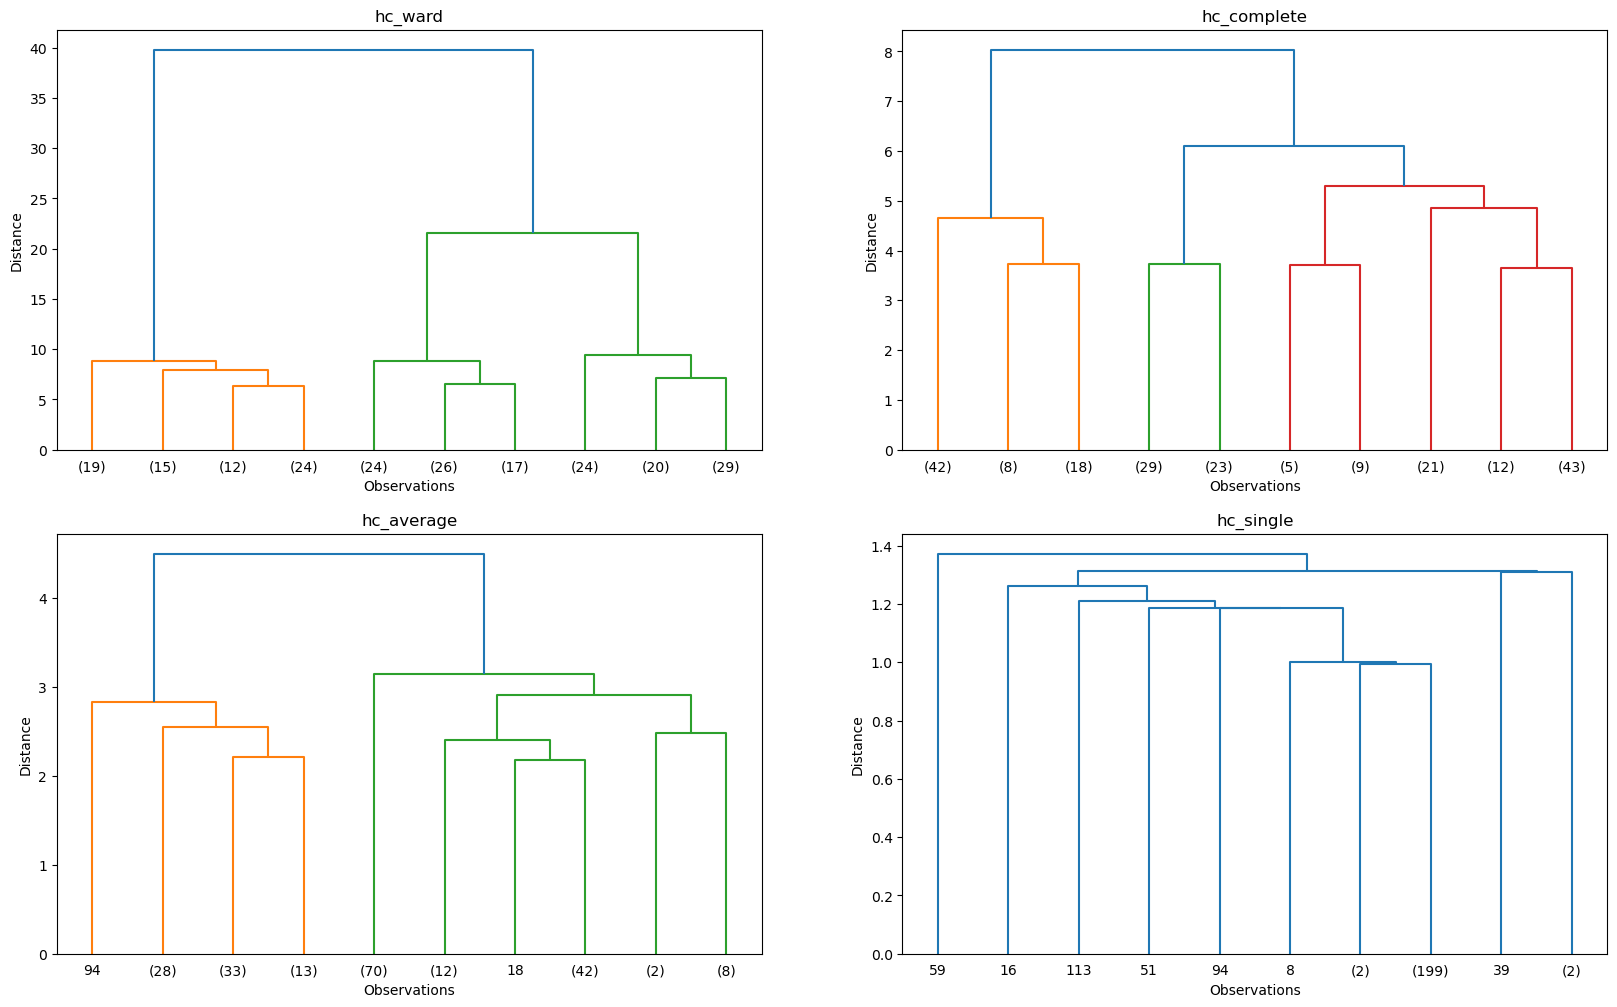

In [72]:
linkage_dict = {"hc_ward": linkage(y=X, method="ward"),
                "hc_complete": linkage(X, "complete"),
                "hc_average": linkage(X, "average"),
                "hc_single": linkage(X, "single")}


plot_list = list(range(221, 225))

plt.figure(figsize=(20, 12))

for _plot, (title, method) in zip(plot_list, linkage_dict.items()):
    plt.subplot(_plot)
    plt.title(title)
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(method, truncate_mode="lastp", p=10, leaf_font_size=10)

### Model Building and label visualisation

In [73]:
from sklearn.cluster import AgglomerativeClustering

In [75]:
model1 = AgglomerativeClustering(
    n_clusters=3, affinity="euclidean", linkage="ward")
model1.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [76]:
df["cluster_1"] = model1.labels_

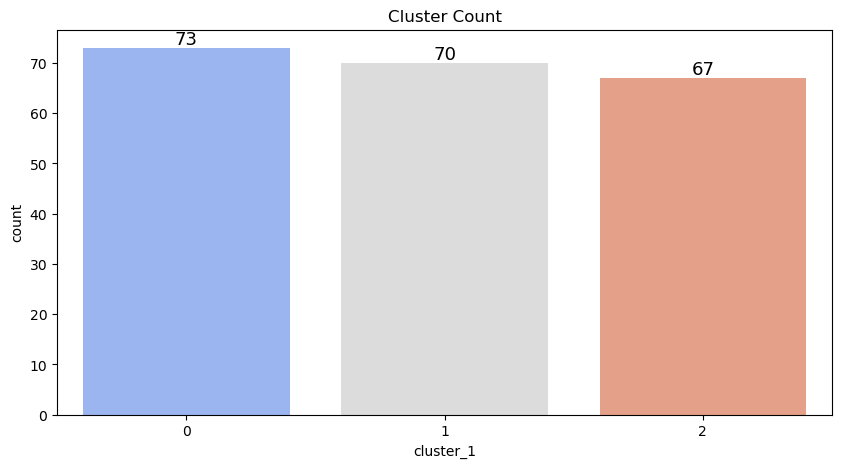

In [77]:
plt.figure(figsize=(10, 5))
plt.title("Cluster Count")
ax = sns.countplot(x=df.cluster_1, palette="coolwarm")
# ax.bar_label(ax.containers[0])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                size=13, xytext=(0, 6),
                textcoords='offset points')
plt.show()

In [78]:
pd.crosstab(df.kernel_class, df.cluster_1)  # 1--17, 2--15, 3--16, 4--17

cluster_1,0,1,2
kernel_class,,,
Canadian,5,0,65
Kama,64,4,2
Rosa,4,66,0


In [80]:
fig = px.scatter_3d(x=df["length_of_kernel_groove"],
                    y=df["width_of_kernel"],
                    z=df["length_of_kernel"],
                    color=df.cluster,
                    labels={"x": "length_of_kernel_groove",
                            "y": "width_of_kernel",
                            "z": "length_of_kernel"},
                    hover_name=df["kernel_class"])

fig.show()

### Evaluate

In [81]:
# towards to 1 means, data good clustered by model
print(f'Silhouette Score(n=3): {silhouette_score(X, df.cluster_1)}')

Silhouette Score(n=3): 0.3926339709101015


In [82]:
agglo_ari = ari(df["kernel_class"], df.cluster_1)
agglo_ari

0.796998283593012

In [83]:
aglo = pd.DataFrame({"ARI": agglo_ari, "Silhouette Score": silhouette_score(
    X, df.cluster_1)}, index=["Aglomerative"])

In [84]:
aglo

,ARI,Silhouette Score
Aglomerative,0.80,0.39


In [85]:
scores_df = pd.concat([scores_df, aglo])
scores_df

,ARI,Silhouette Score
Kmeans,0.77,0.40
Aglomerative,0.80,0.39


# PCA

In [86]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

new_X = pca.fit_transform(X)

In [87]:
np.cumsum(pca.explained_variance_ratio_)

array([0.71874303, 0.88982486, 0.9866825 ])

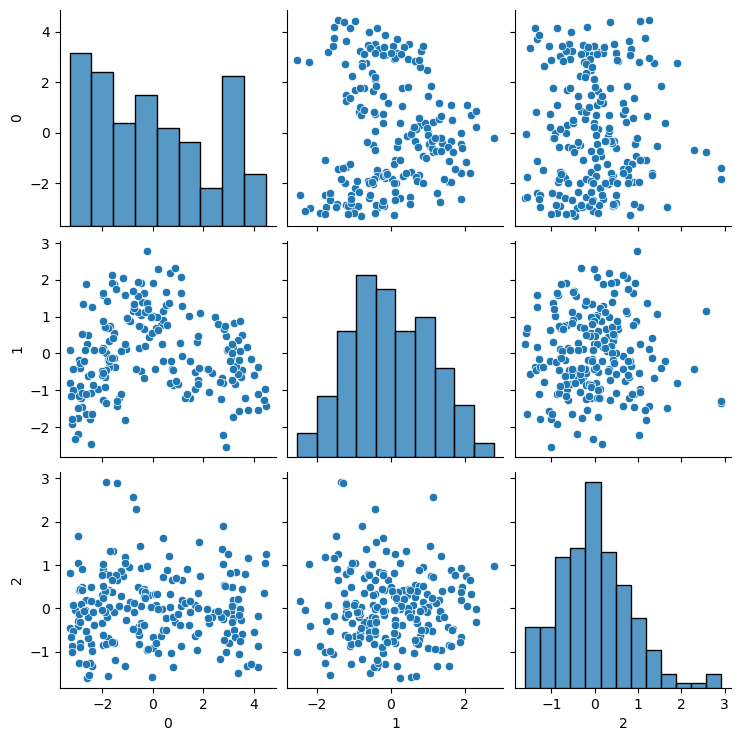

In [88]:
sns.pairplot(pd.DataFrame(new_X))

In [89]:
result = []
for _ in range(10):
    result.append(hopkins(new_X, .05))
np.mean(result)

0.6347852393661875

## Kmeans with PCA

In [90]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(new_X)

KMeans(n_clusters=3, random_state=42)

In [91]:
pd.crosstab(df["kernel_class"], model.labels_)  # 1--17, 2--15, 3--16, 4--17

col_0,0,1,2
kernel_class,,,
Canadian,66,0,4
Kama,5,2,63
Rosa,0,65,5


### Evaluate

In [92]:
fig = px.scatter_3d(x=new_X[:, 0],
                    y=new_X[:, 1],
                    z=new_X[:, 2],
                    color=model.labels_,
                    labels={"x": "first comp.",
                            "y": "second comp.",
                            "z": "third comp."},
                    hover_name=df["kernel_class"])

fig.show()

In [93]:
df["pca_cluster"] = model.labels_

In [94]:
# towards to 1 means, data good clustered by model
print(f'Silhouette Score(n=3): {silhouette_score(new_X, df.pca_cluster)}')

Silhouette Score(n=3): 0.4100823639350388


In [95]:
kmeans_pca_ari = ari(df["kernel_class"], df.pca_cluster)
kmeans_pca_ari

0.7850359051341558

In [96]:
kmeans_pca = pd.DataFrame({"ARI": kmeans_pca_ari, "Silhouette Score": silhouette_score(
    new_X, df.pca_cluster)}, index=["Kmeans_pca"])

In [97]:
scores_df = pd.concat([scores_df, kmeans_pca])
scores_df

,ARI,Silhouette Score
Kmeans,0.77,0.40
Aglomerative,0.80,0.39
Kmeans_pca,0.79,0.41


## Hierarchical with PCA

In [99]:
model1 = AgglomerativeClustering(
    n_clusters=3, affinity="euclidean", linkage="ward")
model1.fit_predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [100]:
pd.crosstab(df["kernel_class"], model1.labels_)  # 1--17, 2--15, 3--16, 4--16

col_0,0,1,2
kernel_class,,,
Canadian,5,0,65
Kama,64,1,5
Rosa,5,65,0


In [101]:
fig = px.scatter_3d(x=new_X[:, 0],
                    y=new_X[:, 1],
                    z=new_X[:, 2],
                    color=model1.labels_,
                    labels={"x": "first comp.",
                            "y": "second comp.",
                            "z": "third comp."},
                    hover_name=df["kernel_class"])

fig.show()

### Evaluate

In [102]:
df["pca_cluster1"] = model1.labels_

In [103]:
# towards to 1 means, data good clustered by model
print(f'Silhouette Score(n=3): {silhouette_score(new_X, df.pca_cluster1)}')

Silhouette Score(n=3): 0.40314992196781263


In [104]:
agglo_pca_ari = ari(df["kernel_class"], df.pca_cluster1)
agglo_pca_ari

0.784382796580442

In [105]:
aglo_pca = pd.DataFrame({"ARI": kmeans_pca_ari, "Silhouette Score": silhouette_score(
    new_X, df.pca_cluster1)}, index=["Aglomerative_pca"])

In [106]:
scores_df = pd.concat([scores_df, aglo_pca])
scores_df

,ARI,Silhouette Score
Kmeans,0.77,0.40
Aglomerative,0.80,0.39
Kmeans_pca,0.79,0.41
Aglomerative_pca,0.79,0.40


# Conclusion:
- we have 3 globular cluster
- we tried 4 different model and since we have the labels Aglomerative Clustering is the best to capture paterns in the data
- Unfortunately we **can't** use it to make further labeling, because it is a trunsductive model.

# DBSCAN (optional)

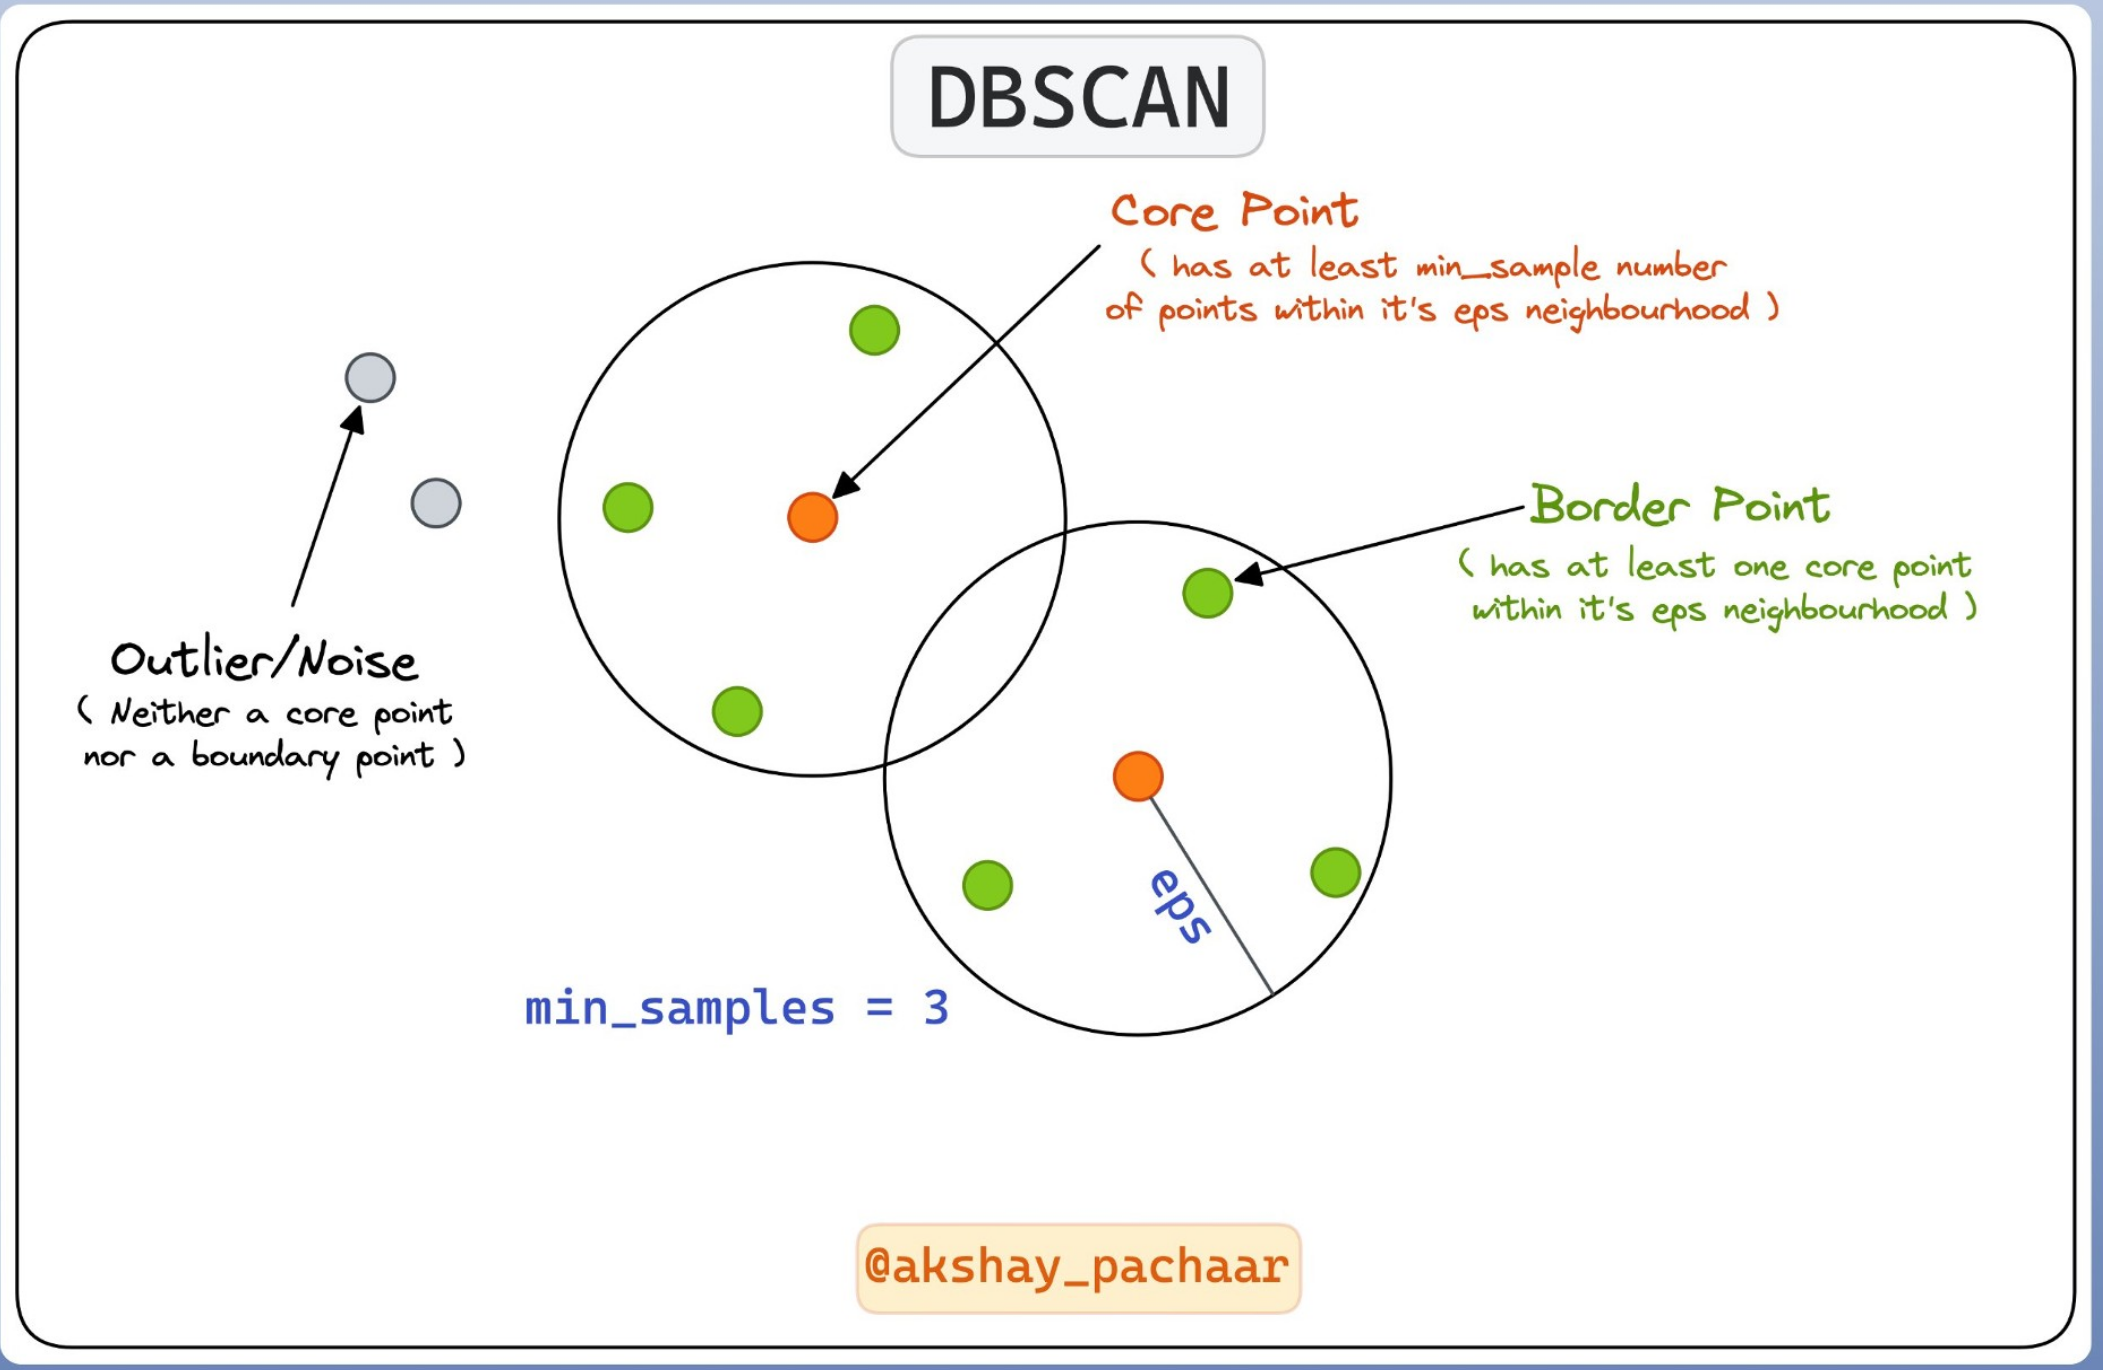

In [109]:
from sklearn.cluster import DBSCAN

In [110]:
np.linspace(0.1, 2, 20)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [111]:
z = 0
for i in np.linspace(0.1, 2, 20):
    for x in range(1, 10):
        model2 = DBSCAN(eps=i, min_samples=x)
        if pd.Series(model2.fit_predict(X)).nunique() == 3:
            print(i, x)
            # break

0.8999999999999999 3
0.8999999999999999 7
0.8999999999999999 8
0.8999999999999999 9
0.9999999999999999 2
0.9999999999999999 7
0.9999999999999999 8
0.9999999999999999 9
1.0999999999999999 2
1.2 2
1.3 2


In [112]:
model2 = DBSCAN(eps=.9, min_samples=7)

In [113]:
model2.fit_predict(X)

array([ 0,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0, -1, -1,
       -1, -1,  0,  0,  0, -1, -1,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0, -1,  0, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0, -1,  0, -1, -1, -1, -1,  0,  0, -1,  0,  0,
        0,  0,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1,
        1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  0,
        1, -1, -1,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,
        0,  0,  0, -1,  0,  0], dtype=int64)

In [114]:
df["cluster_2"] = model2.labels_

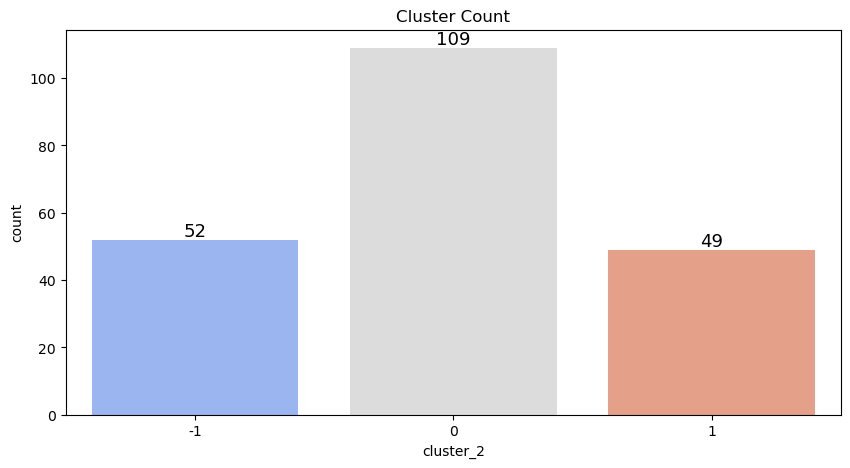

In [115]:
plt.figure(figsize=(10, 5))
plt.title("Cluster Count")
ax = sns.countplot(x=df.cluster_2, palette="coolwarm")
# ax.bar_label(ax.containers[0])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()),
                ha='center',
                va='center',
                size=13, xytext=(0, 6),
                textcoords='offset points')
plt.show()

In [116]:
df[df["cluster_2"] == 0]

,area,perimeter,compactness,length_of_kernel,width_of_kernel,assym_coef,length_of_kernel_groove,kernel_class,cluster,cluster_1,pca_cluster,pca_cluster1,cluster_2
0,15.26,14.84,0.87,5.76,3.31,2.22,5.22,Kama,2,0,2,0,0
1,14.88,14.57,0.88,5.55,3.33,1.02,4.96,Kama,2,0,2,0,0
2,14.29,14.09,0.91,5.29,3.34,2.70,4.83,Kama,2,0,2,0,0
3,13.84,13.94,0.90,5.32,3.38,2.26,4.80,Kama,2,0,2,0,0
5,14.38,14.21,0.90,5.39,3.31,2.46,4.96,Kama,2,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,12.37,13.47,0.86,5.20,2.96,3.92,5.00,Canadian,1,2,0,2,0
205,12.19,13.20,0.88,5.14,2.98,3.63,4.87,Canadian,1,2,0,2,0
206,11.23,12.88,0.85,5.14,2.79,4.33,5.00,Canadian,1,2,0,2,0
208,11.84,13.21,0.85,5.17,2.84,3.60,5.04,Canadian,1,2,0,2,0


In [125]:
df[df["cluster_2"] == 2]

,area,perimeter,compactness,length_of_kernel,width_of_kernel,assym_coef,length_of_kernel_groove,kernel_class,cluster,cluster_1,pca_cluster,pca_cluster1,cluster_2,cluster_3


# GAUSSIAN MIXTURE (Optional)

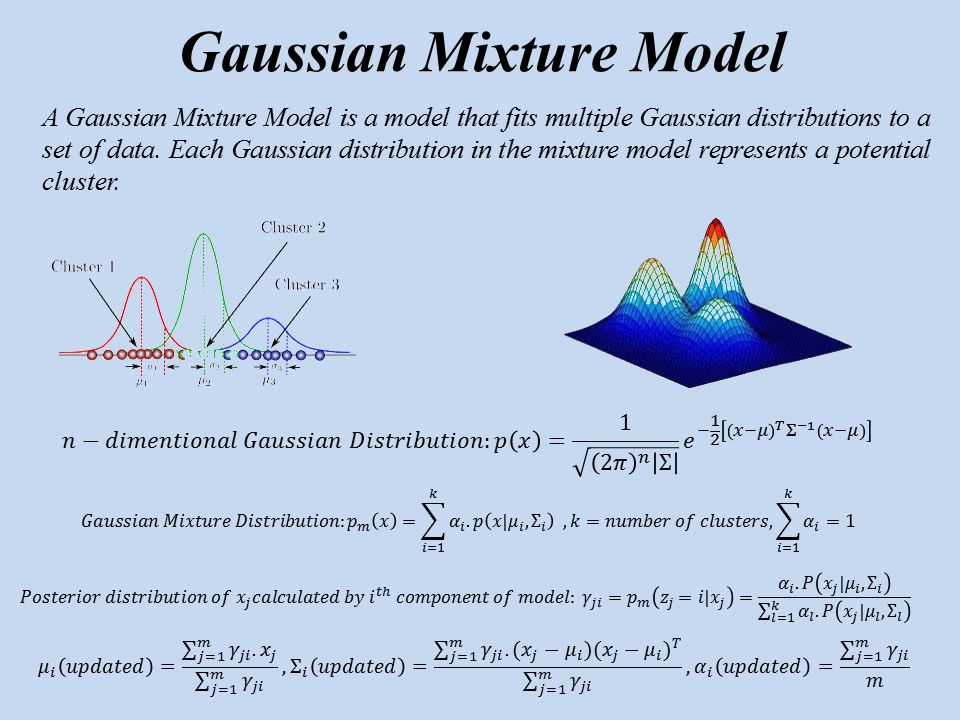

In [117]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

In [118]:
model3 = GaussianMixture(n_components=3, n_init=10,
                         covariance_type="full", random_state=42)

In [119]:
model3.fit_predict(new_X)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2], dtype=int64)

In [120]:
df["cluster_3"] = model3.fit_predict(new_X)

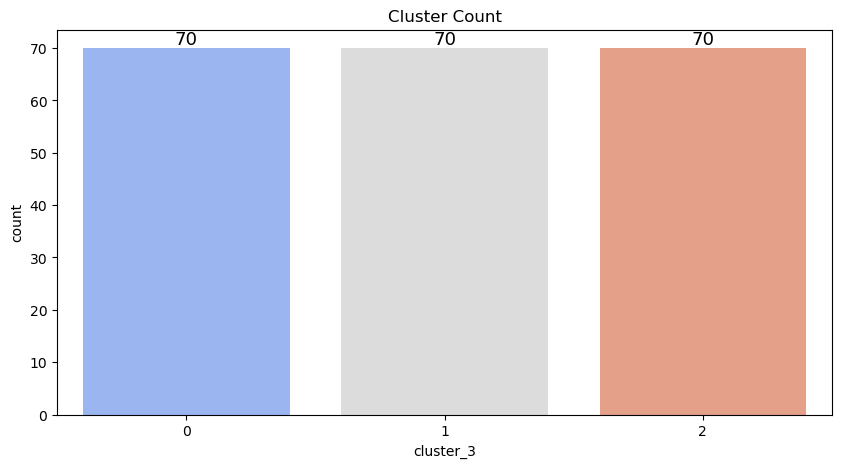

In [121]:
plt.figure(figsize=(10, 5))
plt.title("Cluster Count")
ax = sns.countplot(x=df.cluster_3, palette="coolwarm")
# ax.bar_label(ax.containers[0])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2,
                 bar.get_height()),
                ha='center',
                va='center',
                size=13, xytext=(0, 6),
                textcoords='offset points')

plt.show()

In [122]:
pd.crosstab(df["kernel_class"], df["cluster_3"])

cluster_3,0,1,2
kernel_class,,,
Canadian,0,5,65
Kama,4,61,5
Rosa,66,4,0


<Axes: ylabel='Density'>

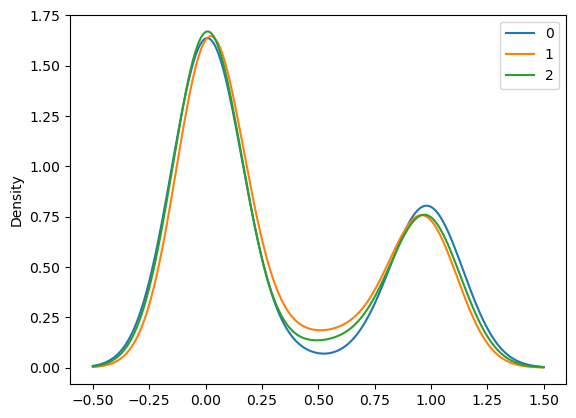

In [123]:
pd.DataFrame(model3.predict_proba(new_X)).plot(kind="kde")